In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

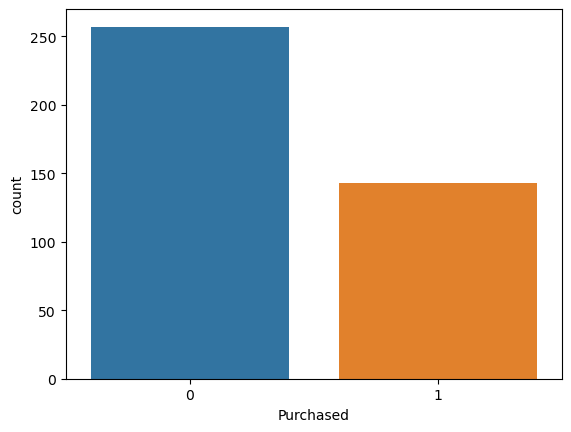

In [7]:
sns.countplot(x='Purchased',data=df)

In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

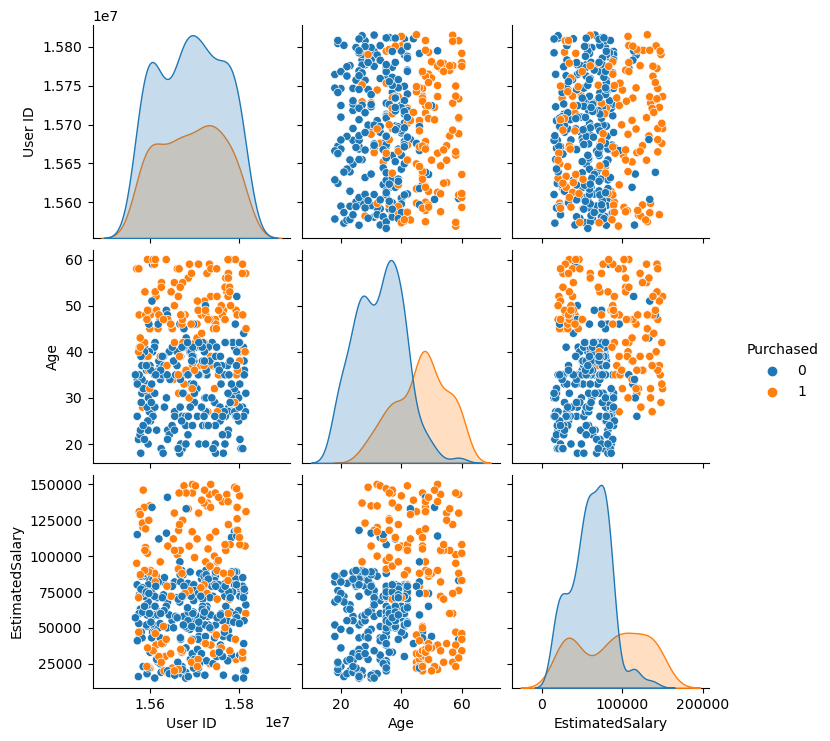

In [9]:
sns.pairplot(df,hue='Purchased')

<AxesSubplot:>

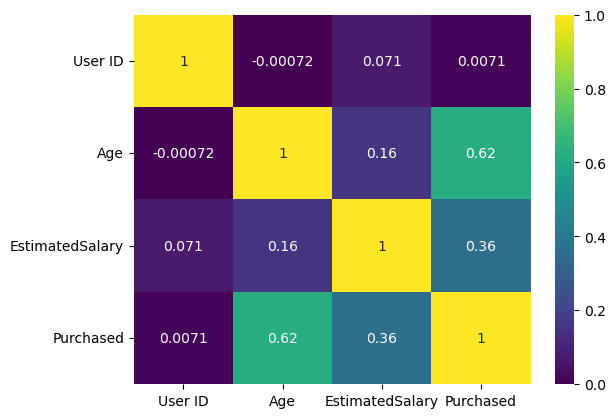

In [10]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [11]:
df['Sex_male']=pd.get_dummies(df['Gender'],drop_first=True)

In [12]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Sex_male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [13]:
X = df.drop(['User ID','Purchased','Gender'],axis=1)
y = df['Purchased']

In [14]:
X

,Age,EstimatedSalary,Sex_male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegressionCV

In [21]:
log_model = LogisticRegressionCV()

In [22]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [29]:
y_pred = log_model.predict(scaled_X_test)

In [30]:
confusion_matrix(y_test,y_pred)

array([[21,  6],
       [ 3, 10]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


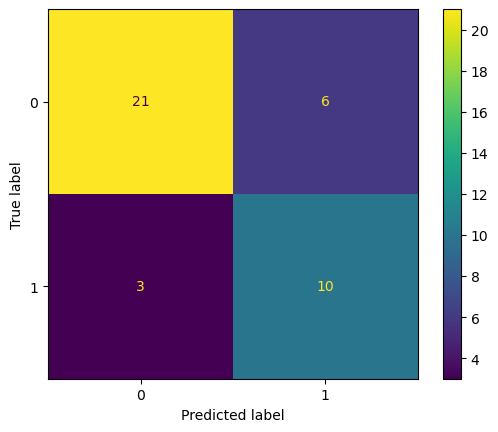

In [31]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.62      0.77      0.69        13

    accuracy                           0.78        40
   macro avg       0.75      0.77      0.76        40
weighted avg       0.79      0.78      0.78        40



In [64]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


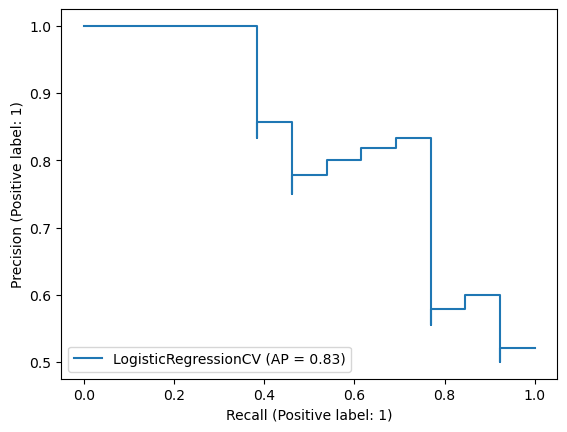

In [65]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


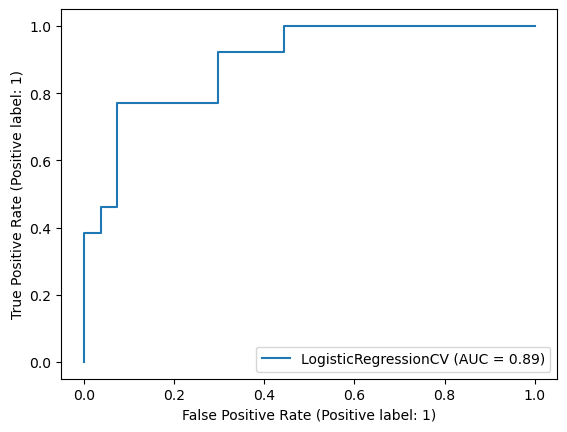

In [56]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [58]:
X_test.iloc[10]

Age                    37
EstimatedSalary    144000
Sex_male                1
Name: 222, dtype: int64

In [59]:
y_test.iloc[10]

1

In [61]:
log_model.predict([X_test.iloc[10]])

array([1], dtype=int64)

In [63]:
log_model.predict_proba([X_test.iloc[10]])

array([[0., 1.]])